In [1]:
import numpy as np
import matplotlib.pyplot as plt   
from numpy import asarray

In [2]:
data = np.loadtxt('anomaly-s118.dat')

In [3]:
print("data dimension = ",data.ndim)

data dimension =  2


In [4]:
print("data shape = ",data.shape)

data shape =  (100, 100)


In [5]:
data_1d = list()
for i in range(100):
    for j in range(100):
        data_1d.append(data[i,j])

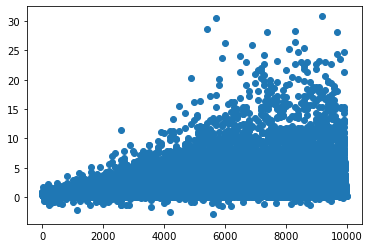

In [6]:
plt.plot(data_1d,'o')
plt.show()

In [7]:
k_neighbor = 4
print()
print(f"Taking k={k_neighbor} for Kth nersert neighbor distance based approch")


Taking k=4 for K nersert neighbor distance based approch


In [8]:
K_Nearest_Neighbor_max_distance = list()

In [9]:
for i in range(100):
    for j in range(100):
        test_point = data[i,j]
        k_nearest_neighbor = list()
        
        k_nearest_neighbor = abs(data_1d-test_point)
            
        k_nearest_neighbor.sort()
        k_nrearest_dist = k_nearest_neighbor[1:k_neighbor+1]
        K_Nearest_Neighbor_max_distance.append(max(k_nrearest_dist))
            

In [10]:
K_Nearest_Neighbor_max_distance

[0.0010830000000000561,
 0.00041399999999991444,
 0.00046399999999990893,
 0.00043599999999999195,
 0.001475000000000004,
 0.0006230000000000402,
 0.0004889999999999617,
 0.0005299999999999194,
 0.00032199999999998896,
 0.00048199999999998244,
 0.00016199999999999548,
 0.0005140000000000144,
 0.0005950000000000122,
 0.0008839999999999959,
 0.00031200000000003447,
 0.00016299999999996873,
 0.00022699999999997722,
 0.00021300000000001873,
 3.599999999998049e-05,
 4.299999999995974e-05,
 0.00022100000000002673,
 0.00020899999999995922,
 0.0003770000000000162,
 0.0007110000000000172,
 0.00046600000000002195,
 0.0003349999999999742,
 0.0005629999999999802,
 0.0005729999999999902,
 0.0005850000000000022,
 0.000138000000000027,
 0.00019099999999999673,
 0.0006010000000000182,
 0.00044199999999999795,
 0.00045999999999996044,
 9.500000000001174e-05,
 0.0005679999999999852,
 0.00012599999999998723,
 0.0003720000000000112,
 0.00028600000000000847,
 0.0006659999999999999,
 0.0002520000000000022,


In [11]:
print("The statistics of Kth nearest neighbor distance are as follows:-")
print()

The statistics of Kth nearest neighbor distance are as follows:-



In [12]:
print("Median of kth nearest neighbor distances = ",np.median(K_Nearest_Neighbor_max_distance))

Median of k nearest neighbor distances =  0.0009980000000000544


In [13]:
print("Mean of kth nearest neighbor distances = ",np.mean(K_Nearest_Neighbor_max_distance))

Mean of k nearest neighbor distances =  0.0073762456000000046


In [14]:
print("Maximum of kth nearest neighbor distances = ",np.max(K_Nearest_Neighbor_max_distance))

Maximum of k nearest neighbor distances =  2.6464350000000003


In [15]:
print("95th percentile of kth nearest neighbor distances = ",np.percentile(K_Nearest_Neighbor_max_distance,95))

95th percentile of k nearest neighbor distances =  0.01921460000000023


In [16]:
print("The threshhold distance r is taken as the 95th percentile")
r = np.percentile(K_Nearest_Neighbor_max_distance,95)

The threshhold distance r is tkane as the 95th percentile


In [17]:
count = 0
for i in range(len(K_Nearest_Neighbor_max_distance)):
    if K_Nearest_Neighbor_max_distance[i]>r:
        count = count+1
print("Number of ouliers consideing r is the 95th percentile = ",count)

Number of ouliers consideing r is the 95th percentile =  500


{'whiskers': [<matplotlib.lines.Line2D at 0x20f50e476d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20f50e47d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f50e47370>],
 'medians': [<matplotlib.lines.Line2D at 0x20f50e56490>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f50e567f0>],
 'means': []}

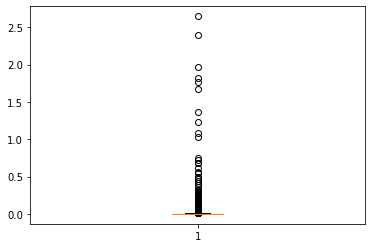

In [18]:
plt.boxplot(K_Nearest_Neighbor_max_distance)

In [19]:
mask = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        test_point = data[i,j]
        k_nearest_neighbor = list()
        
        k_nearest_neighbor = abs(data_1d-test_point)
            
        k_nearest_neighbor.sort()
        k_nrearest_dist = k_nearest_neighbor[1:k_neighbor+1]
        if max(k_nrearest_dist)> r:
            mask[i,j] = 1

In [20]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [21]:
np.savetxt('answer-s118.dat', asarray(mask),delimiter=' ',fmt='%d')

In [22]:
np.savetxt('answer-s118.txt', asarray(mask),delimiter=' ',fmt='%d')